The goal of this notebook is to provide an easy tutorial showcasing the different features of the BioFuzzNet module.

In [1]:
# Imports
# External imports
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Module imports
import biofuzznet.biofuzznet as biofuzznet
import biofuzznet.biofuzzdataset as biofuzzdataset
import biofuzznet.Hill_function as Hill_function
import biofuzznet.utils as utils
import biofuzznet.biomixnet as biomixnet

# Building a BioFuzzNet or a BioMixNet

## From scratch

In [2]:
# Create an empty BioFuzzNet
G_not = biofuzznet.BioFuzzNet(None, None)

# Add nodes
G_not.add_fuzzy_node("A", "BIO") # A biological node
G_not.add_fuzzy_node("B", 'BIO')
G_not.add_fuzzy_node("NOT A", "NOT") # A logical not gate
# Add edges
G_not.add_transfer_edge("A", "NOT A") # A transfer edge downstream of a biological node
G_not.add_simple_edge("NOT A", "B") # A simple edge downstream of a logical node

In [3]:
# Creates a BioFuzzNet from a list of nodes and a list of edges
# If a node has more than 2 incoming edges, it assumes those are integrated via an OR gate
# This is the same network as above

node_list = ["A", "B"]
edge_dic = {("A", "B"): -1}
G_not_from_list = biofuzznet.BioFuzzNet(node_list, edge_dic)

In [4]:
# Draw the networks to compare them
# Color schemes for the drawing
general_edge_color_scheme  = {"simple": "b", "transfer_function": "r"}
general_node_shape_scheme = {"biological": 's', "logic_gate_AND": 'o', "logic_gate_OR": 'd', "logic_gate_NOT": '^'}



{'A': array([1.00000000e+00, 1.98682151e-08]),
 'B': array([-0.50000007,  0.86602542]),
 'NOT A': array([-0.49999993, -0.86602544])}

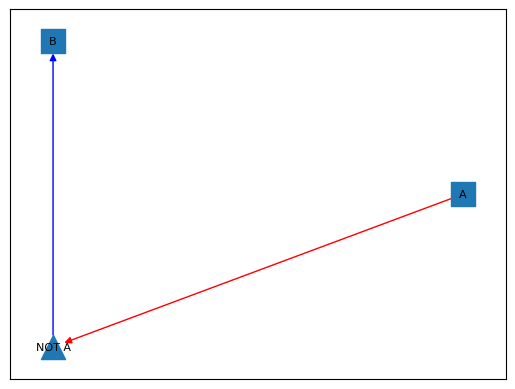

In [5]:
utils.draw_BioFuzzNet(G_not, general_edge_color_scheme, general_node_shape_scheme)  

{'A': array([1.00000000e+00, 1.98682151e-08]),
 'B': array([-0.50000007,  0.86602542]),
 'not1': array([-0.49999993, -0.86602544])}

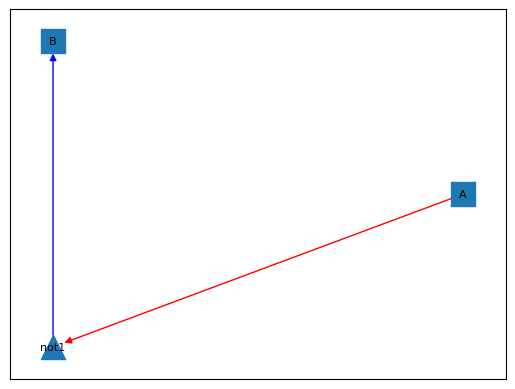

In [6]:
utils.draw_BioFuzzNet(G_not_from_list, general_edge_color_scheme, general_node_shape_scheme)

In [7]:
# Create the BioFuzzNet from file
BFZ_from_file = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("biofuzznet/example_networks/Network_without_GRN.tsv")

In [8]:
# Create the BioMixNet from file
BMX = biomixnet.BioMixNet.build_BioMixNet_from_file("biofuzznet/example_networks/Network_without_GRN.tsv")

{'CD28': array([ 1.00000000e+00, -3.48154934e-10]),
 'PI3K': array([0.99810332, 0.0615609 ]),
 'Lck': array([0.99242049, 0.12288829]),
 'Grb2': array([0.9829731 , 0.18374951]),
 'GADS': array([0.96979696, 0.24391371]),
 'Akt': array([0.95294201, 0.30315268]),
 'AP1': array([0.93247223, 0.36124167]),
 'ERK12': array([0.90846527, 0.41796034]),
 'GSK3b': array([0.8810122 , 0.47309354]),
 'CD3z': array([0.8502171 , 0.52643216]),
 'PLCg1': array([0.81619692, 0.57777381]),
 'MAPK': array([0.77908057, 0.6269238 ]),
 'mTOR': array([0.7390089 , 0.67369562]),
 'Bad': array([0.69613397, 0.7179119 ]),
 'cNFkB': array([0.65061832, 0.7594049 ]),
 'NFAT': array([0.60263467, 0.7980172 ]),
 'p38': array([0.55236501, 0.83360237]),
 'Bcl2': array([0.49999997, 0.86602545]),
 'BclXL': array([0.44573835, 0.8951633 ]),
 'NFkB': array([0.38978586, 0.92090553]),
 'IL2': array([0.33235478, 0.94315445]),
 '41BB': array([0.27366299, 0.96182567]),
 'TRAF1': array([0.21393308, 0.9768483 ]),
 'TRAF2': array([0.15339

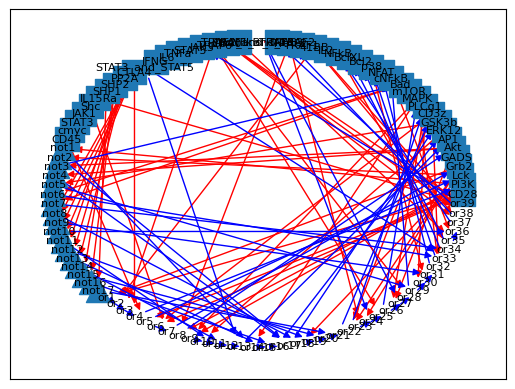

In [9]:
# You can also draw BioMixNet with the draw_BioFuzzNet function
# But this one is big so it won't look good
utils.draw_BioFuzzNet(BMX, general_edge_color_scheme, general_node_shape_scheme)

In [10]:
# This is what a biological node looks like
BFZ_from_file.nodes()["41BB"]

{'node_type': 'biological', 'output_state': None, 'ground_truth': None}

In [11]:
# This is what a logical node looks like
BFZ_from_file.nodes()["or1"]

{'node_type': 'logic_gate_OR', 'output_state': None}

In [12]:
# This is what a transfer edge looks like
BFZ_from_file.edges()[("CD28", "GADS")]

{'edge_type': 'transfer_function',
 'layer': HillTransferFunction(),
 'weight': 1}

# Simulating a BioFuzzNet

In [13]:
# Let's use the CAR domain signalling network
my_model = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("biofuzznet/example_networks/Network_without_GRN.tsv")

In [14]:
# It is initialised with random transfer function parameters
for edge in my_model.transfer_edges:
    # Each transfer edge has a layer
    layer = my_model.edges()[edge]["layer"]
    # Each layer has a n and an K parameter
    print(f"The edge {edge} has parameter n = {torch.exp(layer.n)} and K = {torch.sigmoid(layer.K)}")
    # Those parameters are torch.nn.Parameters and thus have a grad_fn which corresponds to their gradient

The edge ('CD28', 'GADS') has parameter n = tensor([0.6164], grad_fn=<ExpBackward0>) and K = tensor([0.4365], grad_fn=<SigmoidBackward0>)
The edge ('CD28', 'or1') has parameter n = tensor([2.7922], grad_fn=<ExpBackward0>) and K = tensor([0.0978], grad_fn=<SigmoidBackward0>)
The edge ('CD28', 'or5') has parameter n = tensor([1.6729], grad_fn=<ExpBackward0>) and K = tensor([0.4143], grad_fn=<SigmoidBackward0>)
The edge ('CD28', 'or6') has parameter n = tensor([0.7930], grad_fn=<ExpBackward0>) and K = tensor([0.4469], grad_fn=<SigmoidBackward0>)
The edge ('PI3K', 'not1') has parameter n = tensor([0.2932], grad_fn=<ExpBackward0>) and K = tensor([0.4907], grad_fn=<SigmoidBackward0>)
The edge ('PI3K', 'or8') has parameter n = tensor([0.4331], grad_fn=<ExpBackward0>) and K = tensor([0.1619], grad_fn=<SigmoidBackward0>)
The edge ('PI3K', 'or9') has parameter n = tensor([0.4334], grad_fn=<ExpBackward0>) and K = tensor([0.3977], grad_fn=<SigmoidBackward0>)
The edge ('Lck', 'not2') has parameter 

In [15]:
# What are its root nodes?
my_model.root_nodes

['CD28', '41BB', 'CD40', 'CTLA4', 'IL15Ra', 'CD45']

In [16]:
# Currently the network has None values at the output state and ground truth tensors
print(f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}")

The current output state at node 41BB is None and the current ground truth is None


In [17]:
# We can give both of those fields a random value
my_model.initialise_random_truth_and_output(3000)
print(f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}")

The current output state at node 41BB is tensor([0.3478, 0.0353, 0.3666,  ..., 0.2560, 0.7637, 0.4475]) and the current ground truth is tensor([0.3093, 0.7673, 0.3561,  ..., 0.3775, 0.1822, 0.7694])


In [18]:
# That works!
# But what if we want to specify a given value as the ground truth?
# Let's say that we know the value at the root nodes

tensor_list = [torch.ones(3000) for i in range(6)]
ground_truth = {my_model.root_nodes[i]: tensor_list[i] for i in range(len(my_model.root_nodes))}

# We can set the ground truth at the root nodes 
my_model.set_network_ground_truth(ground_truth)
print(f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}")

# But careful! The nodes that are not in ground_truth are not modified
# (If the warnings were not enough to warn you)
# (I do know they get pretty annoying, you can disable them during optimisation ...
# ... but I suggest keeping them when you're setting up your network so you are aware of possible misbehaviors)
print(f"The current output state at node ERK12 is {my_model.nodes()['ERK12']['output_state']} and the current ground truth is {my_model.nodes()['ERK12']['ground_truth']}")


The current output state at node 41BB is tensor([1., 1., 1.,  ..., 1., 1., 1.]) and the current ground truth is tensor([1., 1., 1.,  ..., 1., 1., 1.])
The current output state at node ERK12 is tensor([0.0511, 0.4842, 0.2969,  ..., 0.1570, 0.0321, 0.4352]) and the current ground truth is tensor([0.5911, 0.2206, 0.5927,  ..., 0.8653, 0.4944, 0.4290])


/u/adr/Code/biofuzznet/biofuzznet/biofuzznet.py:362: UserWarning: Node PI3K is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/u/adr/Code/biofuzznet/biofuzznet/biofuzznet.py:362: UserWarning: Node Lck is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/u/adr/Code/biofuzznet/biofuzznet/biofuzznet.py:362: UserWarning: Node Grb2 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/u/adr/Code/biofuzznet/biofuzznet/biofuzznet.py:362: UserWarning: Node GADS is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/u/adr/Code/biofuzznet/biofuzznet/biofuzznet.py:362: UserWarning: Node Akt is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/u/adr/Code/biofuzznet/biofuzznet/biofuzznet.py:362: UserWarning: Node AP1 is not present in ground truth. Its ground_truth value is not set.
  warnings.warn(
/u/adr/Code/biofuzznet/biofuzznet/biofuzzne

In [19]:
# Let's now simulate our model
# For that you need to tell it what nodes you give as input
# Here it's easy, there's no cycle, it's just the root nodes

my_model.sequential_update(my_model.root_nodes)

In [20]:
# Let's see those results
print(f"The current output state at node ERK12 is {my_model.nodes()['ERK12']['output_state']} and the current ground truth is {my_model.nodes()['ERK12']['ground_truth']}")


The current output state at node ERK12 is tensor([0.9519, 0.9519, 0.9519,  ..., 0.9519, 0.9519, 0.9519],
       grad_fn=<SubBackward0>) and the current ground truth is tensor([0.5911, 0.2206, 0.5927,  ..., 0.8653, 0.4944, 0.4290])


In [21]:
# The simulation did work well: the output state tensor has only one value,
#  which makes sense since all 3000 cells had the same value 1 at all inputs
# Notice that the ground truth hasn't changed
# Which is reassuring, we don't want our measuremets to change when the model is simulated
# Now let's try to optimise, shall we?


# Optimisation of a BioFuzzNet

In [22]:
# For a measurement, we need input values and ground truth values (ie the values we're trying to fit) 
# for a training set and a validation set.
# Since we simulated earlier, we do have data that's related through the network
# We'll just use the first 2000 points as a training dataset, and the last 1000 as a validation dataset
# ...
# ...
# Yes I know it's 3000 times the same datapoint, but this is just a tutorial after all

# Let's define the ground truth: it's the result of the previous simulation, so it's already in the output states
ground_truth_to_find = my_model.output_states

# Let's define the inputs and ground_truth for the training and validation set
ground_truth_train = {node: ground_truth_to_find[node][0:2000] for node in ground_truth_to_find.keys()}
ground_truth_test = {node: ground_truth_to_find[node][2000:3000] for node in ground_truth_to_find.keys()}

# The input is just the ground truth values at the root nodes
input_train = {node: ground_truth_train[node] for node in my_model.root_nodes}
input_test = {node: ground_truth_test[node] for node in my_model.root_nodes}

In [23]:
# Then we create a model to optimise: same topology, but different parameters at the transfer function
model_to_fit = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file("biofuzznet/example_networks/Network_without_GRN.tsv")

In [24]:
# Now we just need to specify some optimisation parameters

learning_rate = 5e-3
epochs = 10 # That seems like a lot, but 1 epoch is basically one simulation of the network on all datapoints, so we need a lot of them
batch_size = 300 



In [32]:
# Now let's optimise

loss = model_to_fit.conduct_optimisation(input = input_train,
                                         ground_truth=ground_truth_train,
                                         test_input = input_test,
                                         test_ground_truth= ground_truth_test,
                                         epochs = epochs, 
                                         learning_rate= learning_rate,
                                         batch_size= batch_size
                                         )

100%|██████████| 10/10 [04:13<00:00, 25.37s/it]


In [26]:
# You gte the loss as the output of the optimisation
loss

,time,loss,phase
0,2022-09-27 08:46:05.919041,0.039350,train
1,2022-09-27 08:46:09.939690,0.038988,train
2,2022-09-27 08:46:13.752493,0.038631,train
3,2022-09-27 08:46:17.576172,0.038278,train
4,2022-09-27 08:46:21.505816,0.037930,train
...,...,...,...
75,2022-09-27 08:50:08.807519,0.015036,train
76,2022-09-27 08:50:12.446728,0.014745,train
77,2022-09-27 08:50:16.273032,0.014464,train
78,2022-09-27 08:50:18.851322,0.014192,train


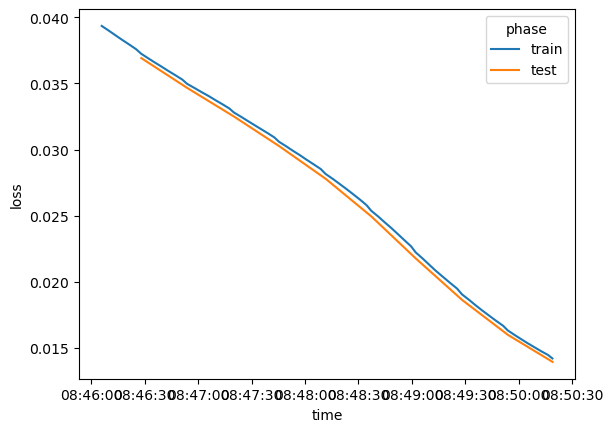

In [27]:
# You can plot it to check that it converges
# It probably won't because we did very few epochs
sns.lineplot(data=loss, x="time", y="loss", hue="phase")
plt.show()

In [28]:
# If you do enough epochs the loss should converge and you should have a model that fits your data
# To simulate using this model, you just need to go through the simulation part of the model
# Keep the parameters that you obtained after optimisation
# Feed in the inputs, and simulate!
# I suggest you try it by yourself on a simpler model that you can run for several 100 of epochs in an acceptable time

# What about BioMixNets?

In [29]:
# It's exactly the same process
# Except you have an additinal type of gates; the MIXED gate
# That has a parameter determining if it's an AND gate, an OR gate, or a mix of the 2 (not good if that happens after optimisation)

BMN = biomixnet.BioMixNet.build_BioMixNet_from_file("biofuzznet/example_networks/manual_network_reduced.tsv")
# Careful; they're called or, but they're actually mixed
BMN.mixed_gates
print([BMN.nodes()[m] for m in BMN.mixed_gates])

[{'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}]


In [30]:
# And this is how you access the gate parameter
print(f"This is the value of the AND parameter at gate or1: {torch.sigmoid(BMN.nodes()['or1']['gate'].AND_param)}. Do not forget that it needs to go through a sigmoid.")

This is the value of the AND parameter at gate or1: 0.5. Do not forget that it needs to go through a sigmoid.


In [31]:
# If the gate parameter is close to 1, then the predicted gate is an AND gate
# If the gate parameter is close to 0, then the predicted gate is an OR gate
# Else: then we have a problem
# Here it's 0.5 because we have not optimised the network yet

# THE END

I think that's it. Good luck with the BioFuzzNet module!